# Make finger-tapping ROI for experiment 3
Use Neurosynth meta-analysis and AAL atlas to create left and right finger-tapping ROIs in MNI space.

In [1]:
%matplotlib inline
from nilearn.datasets import fetch_atlas_msdl
from nilearn import plotting, image
import nibabel as nib

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
msdl = fetch_atlas_msdl()
msdl_img = nib.load(msdl['maps'])
# MSDL is lower resolution, so upsample
msdl_img_upsampled = image.resample_to_img(
    msdl_img, 'data/right_finger_ROI.nii.gz', interpolation='nearest')
msdl_map = msdl_img_upsampled.get_fdata()

striate_idx = int(msdl['labels'].index('Striate'))
striate = msdl_map[..., striate_idx]
striate = striate >= 0.25  # 25%

striate_img = nib.Nifti1Image(
    striate, msdl_img_upsampled.affine, header=msdl_img_upsampled.header)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


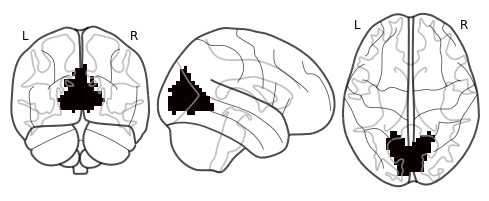

In [3]:
plotting.plot_glass_brain(striate_img)
striate_img.to_filename('data/V1_ROI.nii.gz')

In [4]:
# and save a figure for the manuscript
plotting.plot_glass_brain(striate_img, output_file='data/V1_ROI.png')